# CISC 6930 - Data Mining - Assignment 1:
## Completed by Darshan Patel

In [1]:
# Import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Preliminary Step: In this assignment, you are given the $3$ datasets. Each dataset has a training and a test file. Specifically, these files are:
-  `dataset1: train-100-10.csv`, `test-100-10.csv`
- `dataset2: train-100-100.csv`, `test-100-100.csv`
- `dataset3: train-1000-100.csv`, `test-1000-100.csv`

Start the experiment by creating $3$ additional training files from the train `train-1000-100.csv` file by taking the first $50$, $100$ and $150$ instances respectively. Call them: `train-50(1000)-100.csv`, `train-100(1000)-100.csv` and `train-150(1000)-100.csv`. The corresponding test file for these dataset would be `test-1000-100.csv` and no modification is needed. 

In [2]:
# Import files 
train_100_10 = pd.read_csv('train-100-10.csv')
train_100_100 = pd.read_csv('train-100-100.csv')
train_1000_100 = pd.read_csv('train-1000-100.csv')
test_100_10 = pd.read_csv('test-100-10.csv')
test_100_100 = pd.read_csv('test-100-100.csv')
test_1000_100 = pd.read_csv('test-1000-100.csv')

# New training files creation
new_train_50_100 = train_1000_100[:50]
new_train_100_100 = train_1000_100[:100]
new_train_150_100 = train_1000_100[:150]

# Store datasets in a list that can be iterated over 
datasets = [train_100_10, train_100_100, train_1000_100, 
           new_train_50_100, new_train_100_100, new_train_150_100, 
           test_100_10, test_100_100, test_1000_100, 
           test_1000_100, test_1000_100, test_1000_100]

# Name of the respective datasets in the above list
names = ["train-100-10", "train-100-100", "train-1000-100", 
        "train-50(1000)-100", "train-100(1000)-100", "train-150(1000)-100", 
        "test-100-10", "test-100-100", "test-1000-100",
        "test-1000-100", "test-1000-100", "test-1000-100"]

In [3]:
# Separates the features from the y component in a dataset 
def features_y(dataset):
    
    X = dataset.drop(['y'], axis = 1)
    X = add_col_ones(X)
    Y = dataset[['y']]
    
    return X, Y

In [4]:
# Adds a column of ones to a dataset
def add_col_ones(X):
    
    X0 = np.ones((X.shape[0],1))
    
    return np.hstack((X0, X))

In [5]:
# Performs the linear regression algorithm manually using linear algebra
# to produce w
def linear_regression(X, Y, lamb = 0):
    
    Xt = np.transpose(X)
    XtX = np.dot(Xt, X)
    XtXlambda = XtX + (lamb * np.identity(X.shape[1]))
    XtXinv = np.linalg.inv(XtXlambda)
    XtXinvXt = np.dot(XtXinv, Xt)
    w = np.dot(XtXinvXt, Y)
    
    return w

In [6]:
# Computes the MSE using the actual Ys and the predicted Y 
# provided X and w 
def MSE(X, Y, w):
    
    y_predict = np.dot(X, w)
    diffs = np.sum((y_predict - Y)**2)

    return diffs / X.shape[0]

### Question 1

Implement $L2$ regularized linear regression algorithm with $\lambda$ ranging from $0$ to $150$ (integers only). For each of the $6$ dataset, plot both the training set MSE and the test set MSE as a function of $\lambda$ ($x$-axis) in one graph. 

In [7]:
# Store training set MSE and testing set MSE for all 151 lambda 
# values in a matrix
mse = np.zeros((151,12))

# For each of the 6 datasets, perform the linear regression algorithm 
# and compute the MSEs
for i in range(6):
    
    # Create Xtrain, Ytrain, Xtest, Ytest
    Xtrain, Ytrain = features_y(datasets[i])
    Xtest, Ytest = features_y(datasets[i+6])
    
    # Calculate w based on the lambda value
    for j in range(151):
        
        w = linear_regression(Xtrain, Ytrain, j)
        mse[j][i] = MSE(Xtrain, Ytrain, w)
        mse[j][i+6] = MSE(Xtest, Ytest, w)

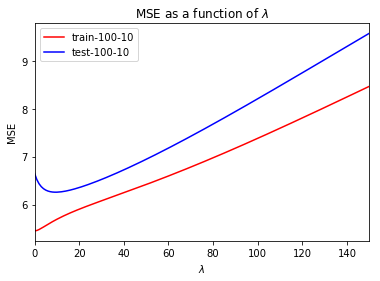

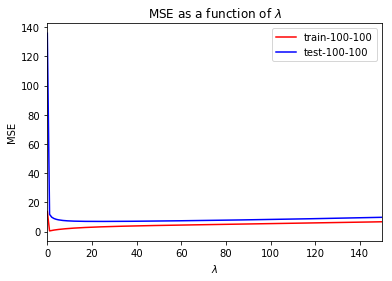

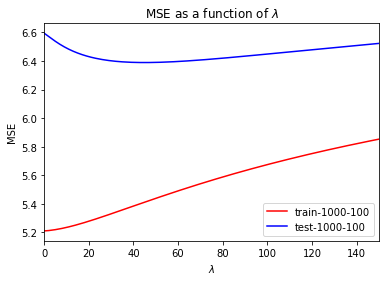

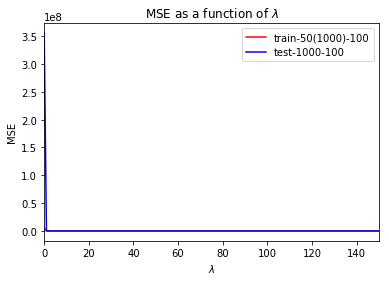

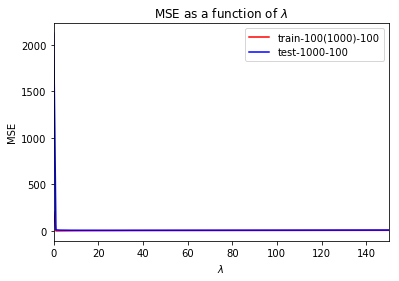

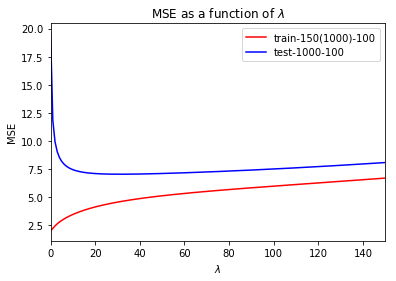

In [8]:
# Plot training set MSE along with testing set MSE for all 6 datasets 
# with appropriate labeling 
for k in range(6):
    plt.plot(mse[:,k], label = names[k], color = 'red')
    plt.plot(mse[:, k+6], label = names[k+6], color = 'blue')
    plt.title(r"MSE as a function of $\lambda$")
    plt.ylabel("MSE")
    plt.xlabel(r"$\lambda$")
    plt.xlim(0,150)
    plt.legend()
    plt.show()

(a) For each dataset, which $\lambda$ value gives the least **test** set MSE?

In [17]:
# Store the best lambda and test mse in a table
# Then print out a message stating the value of the least test set MSE
lambda_mse = np.zeros((6,2))

# Determine the best lambda value and its respective test set mse 
# for each dataset
for val in range(6): 
    best_lambda = np.argmin(mse[:,val+6])
    lambda_mse[val][0] = best_lambda
    lambda_mse[val][1] = mse[best_lambda, val+6]
    print("The lambda value that gave the least test set MSE \n for the ",
          names[val], " dataset is: ", lambda_mse[val][0], ".")

The lambda value that gave the least test set MSE 
 for the  train-100-10  dataset is:  9.0 .
The lambda value that gave the least test set MSE 
 for the  train-100-100  dataset is:  24.0 .
The lambda value that gave the least test set MSE 
 for the  train-1000-100  dataset is:  45.0 .
The lambda value that gave the least test set MSE 
 for the  train-50(1000)-100  dataset is:  12.0 .
The lambda value that gave the least test set MSE 
 for the  train-100(1000)-100  dataset is:  25.0 .
The lambda value that gave the least test set MSE 
 for the  train-150(1000)-100  dataset is:  31.0 .


(b) For each of the datasets `100-100`, `50(1000)-100`, `100(1000)-100`, provide an additional graph with $\lambda$ ranging from $1$ to $150$. 

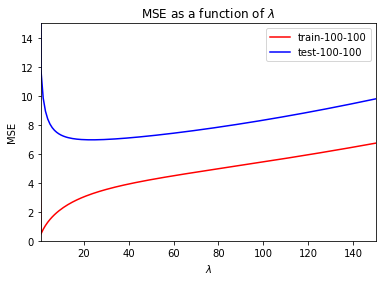

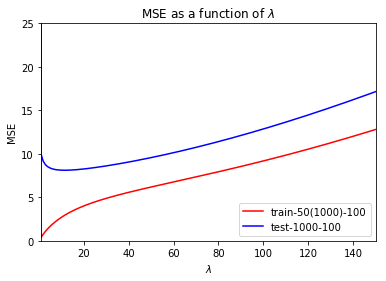

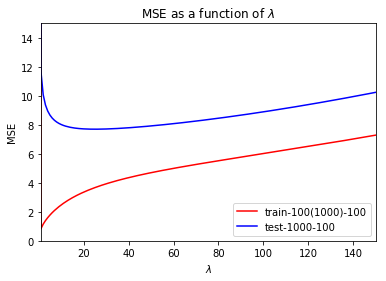

In [10]:
# Plot the training set and testing set MSE for the 3 datasets 
# for lambda ranging from 1 to 150 
# with an appropriate y limit and labels
plt.plot(mse[:,1], label = names[1], color = 'red')
plt.plot(mse[:, 7], label = names[7], color = 'blue')
plt.xlim(1,150)
plt.ylim(0, 15)
plt.title(r"MSE as a function of $\lambda$")
plt.ylabel("MSE")
plt.xlabel(r"$\lambda$")
plt.legend()
plt.show()

plt.plot(mse[:,3], label = names[3], color = 'red')
plt.plot(mse[:, 9], label = names[9], color = 'blue')
plt.xlim(1,150)
plt.ylim(0, 25)
plt.title(r"MSE as a function of $\lambda$")
plt.ylabel("MSE")
plt.xlabel(r"$\lambda$")
plt.legend()
plt.show()

plt.plot(mse[:,4], label = names[4], color = 'red')
plt.plot(mse[:, 10], label = names[10], color = 'blue')
plt.xlim(1, 150)
plt.ylim(0, 15)
plt.title(r"MSE as a function of $\lambda$")
plt.ylabel("MSE")
plt.xlabel(r"$\lambda$")
plt.legend()
plt.show()

(c) Explain why $\lambda = 0$ (i.e., no regularization) gives abnormally large MSEs for those three datasets in (b). 

** Answer: ** No regularization, or $\lambda=0$, gives abnormally large MSEs for those three datasets because overfitting occurs. When $\lambda = 0$, the $w$s are not minimized. Therefore the data in the training set will be fit well and thus create a small MSE. However when the model is tested on the testing set, most of the data will not fit well and thus create an abnormally large MSE. 

### Question 2

From the plots in question $1$, we can tell which value of $\lambda$ is best for each dataset once we know the test data and its labels. This is not realisitic in real world applications. In this part, we use cross validation (CV) to set the value for $\lambda$. Implement the $10$-fold CV technique discussed in class to select the best $\lambda$ value from the **training** set. 

In [11]:
# Create a 3D matrix to store the training set MSEs 
# To understand the matrix, 
# let the row number represent the lambda value,
# the column represent the fold being tested, 
# the 11th column represent the average MSE for the lambda value,
# and the slice represent the training dataset being trained on 
mse_cv = np.zeros((151, 11,6))

# For each of the training set, create a linear regression model
# using 10 fold CV 
for d in range(6): 
    
    # Calculate appropriate size of the fold from the size of the dataset
    fold_size = int(datasets[d].shape[0]/10)
    
    # Create Xtrain, Ytrain, Xtest, and Ytest from the original training 
    # and testing datasets 
    Xtrain, Ytrain = features_y(datasets[d])
    
    # For each fold, separate the actual training and testing set 
    for cv in range(10):
        
        # Determine where the testing set will hold
        left_index = cv*fold_size
        right_index = (cv+1)*fold_size
        
        # Create actual train and test set
        Xtest_cv = Xtrain[left_index:right_index]
        Ytest_cv = Ytrain[left_index:right_index]
        Xtrain_cv = np.vstack((Xtrain[:left_index], Xtrain[right_index:]))
        Ytrain_cv = np.vstack((Ytrain[:left_index], Ytrain[right_index:]))

        # For each lambda value from 0 to 150, calculate w and the 
        # testing set MSE for the fold being tested on
        for lambda_val in range(151):
            
            w = linear_regression(Xtrain_cv, Ytrain_cv, lambda_val)
            mse_cv[lambda_val, cv, d] = MSE(Xtest_cv, Ytest_cv, w)
        
# Calculate the average MSEs
for dataset in range(6):
    for row in range(151):
        mse_cv[row,10,dataset] = mse_cv[row,:,dataset].sum() / 10

(a) Using CV techniques, what is the best choice of $\lambda$ value and the corresponding test set MSE for each of the $6$ datasets?

In [12]:
# Store the best lambda and corresponding test set MSE in a 2D matrix
lambda_mse_cv = np.zeros((6,2))

# For each of the 6 test sets, construct w using the best choice 
# of lambda and the entire training set
# and then test on the testing set
for d in range(6):
    
    # Get the best lambda value 
    best_val = np.argmin(mse_cv[:,10,d])
    lambda_mse_cv[d][0] = best_val
    
    # Create Xtrain, Ytrain, Xtest, Ytest    
    Xtrain, Ytrain = features_y(datasets[d])
    Xtest, Ytest = features_y(datasets[d+6])
    
    # Perform linear regression using the best lambda value to create w
    w = linear_regression(Xtrain, Ytrain, best_val)

    # Calculate the test set MSE and print it 
    lambda_mse_cv[d][1] = MSE(Xtest, Ytest, w)
    print("The best choice of lambda for the ", names[d], "dataset is ",
           best_val, "\n and the corresponding test set MSE is ", 
          lambda_mse_cv[d][1],".")

The best choice of lambda for the  train-100-10 dataset is  11 
 and the corresponding test set MSE is  6.26100224778 .
The best choice of lambda for the  train-100-100 dataset is  11 
 and the corresponding test set MSE is  7.22068046534 .
The best choice of lambda for the  train-1000-100 dataset is  59 
 and the corresponding test set MSE is  6.3956763518 .
The best choice of lambda for the  train-50(1000)-100 dataset is  13 
 and the corresponding test set MSE is  8.11761979178 .
The best choice of lambda for the  train-100(1000)-100 dataset is  15 
 and the corresponding test set MSE is  7.80242422147 .
The best choice of lambda for the  train-150(1000)-100 dataset is  38 
 and the corresponding test set MSE is  7.06272435404 .


(b) How do the values for $\lambda$ and MSE obtained from CV compare to the choice of $\lambda$ and MSE in question 1(a)?

In [27]:
df_1 = pd.DataFrame(lambda_mse, 
                  columns = ["best lambda using L2", "test set MSE"],
                 index = [names[i] for i in range(6)])
df_2 = pd.DataFrame(lambda_mse_cv, 
                   columns = ["best lambda using CV", "test set MSE"],
                    index = [names[i] for i in range(6)])
df_1, df_2


(                     best lambda using L2  test set MSE
 train-100-10                          9.0      6.258031
 train-100-100                        24.0      6.965438
 train-1000-100                       45.0      6.389139
 train-50(1000)-100                   12.0      8.112384
 train-100(1000)-100                  25.0      7.699355
 train-150(1000)-100                  31.0      7.052024,
                      best lambda using CV  test set MSE
 train-100-10                         11.0      6.261002
 train-100-100                        11.0      7.220680
 train-1000-100                       59.0      6.395676
 train-50(1000)-100                   13.0      8.117620
 train-100(1000)-100                  15.0      7.802424
 train-150(1000)-100                  38.0      7.062724)

**Answer:** A comparison of the best lambda values and their test set MSE for both algorithms is given above. For four datasets, the best lambda value was greater when found by cross validation rather than $L2$ regularization. In addition, all six of the test set MSE from cross validation was slightly greater than the one calculated from $L2$ regularization. 

(c) What are the drawbacks of CV? 

**Answer:** The drawbacks of cross validation is that it can be computationally expensive depending on the size of the dataset since the algorithm works with dividing up the data and doing calculations repeatedly on different sets. 

(d) What are the factors affecting the performance of CV? 

**Answer:** The factors affecting the performance of cross validation are 
- the choice of $K$
- the size of the data
- whether the split is done randomly or chosen by row
- the performance metric 

If $K = n$, the size of the data, then this approach is called leave one out cross validation, or LOOCV. This approach leaves randomly chosen data point out for testing and then trains the model on the remaining $n-1$ values. This method is computationally expensive as it has to run $n-1$ times to create the best model. In addition, it creates a high variance because the training sets will look alike. This leads to overfitting. 

### Question 3

Fix $\lambda=1, ~25, ~250$. For each of these values, plot a learning curve for the algorithm using the dataset `1000-100.csv`. 

Note: A learning curve plots the performance (i.e., test set MSE) as a function of the size of the training set. To produce the curve, you need to draw random subsets (of increasing sizes) and record performance (MSE) on the corresponding test set when training on these subsets. In order to get smooth curves, you should repeat the process at least $10$ times and average the results. 

In [14]:
# Create a 3D matrix to store the test set MSEs where
# the row represents the size of the random subset of data
# the column represents the trial and 
# the slice represents the lambda value being used 
LC_MSE = np.zeros((1000, 16, 3))

# Store the lambda values to be used so it can be iterated over 
lambda_vals = [1, 25, 250]

# Create Xtest and Ytest 
Xtest, Ytest = features_y(test_1000_100)

# Perform the model creation and test set MSE calculation 
# for all 3 lambda values
for vals in range(3): 
    
    # Attain the necessary lambda value
    lamb = lambda_vals[vals]
    
    # From a subset of zero 0 to 1000, perform the model creation
    # and test set MSE calculation
    for size in range(1000):

        # Create the model and calculate the test set MSE using
        # 15 randomly selected subsets of the training set
        for trial in range(15):

            # Select the randomly picked training set
            train_set = train_1000_100.sample(size)

            # Create Xtrain and Ytrain            
            Xtrain, Ytrain = features_y(train_set)

            # Perform linear regression using the lambda value to create w 
            w = linear_regression(Xtrain, Ytrain, lamb)

            # Calculate the test set MSE and store it in its respective place 
            LC_MSE[size, trial, vals] = MSE(Xtest, Ytest, w)
        
        # Calculate the mean test set MSE 
        LC_MSE[size,15,vals] = LC_MSE[size,:,vals].sum() / 15

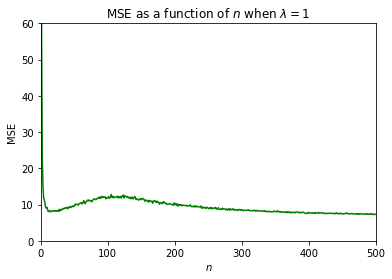

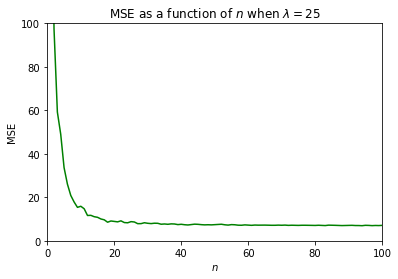

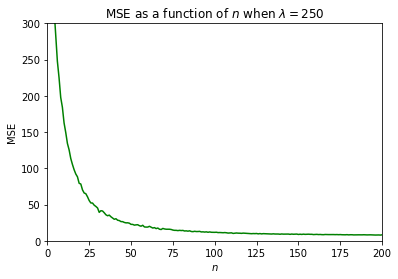

In [15]:
# Plot the test set MSE for each respective lambda value as the 
# size of the subset increases 
plt.plot(LC_MSE[:,15,0], color = 'green')
plt.xlim(0,500)
plt.ylim(0,60)
plt.title(r"MSE as a function of $n$ when $\lambda = 1$")
plt.ylabel("MSE")
plt.xlabel(r"$n$")
plt.show()

plt.plot(LC_MSE[:,15,1], color = 'green')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title(r"MSE as a function of $n$ when $\lambda = 25$")
plt.ylabel("MSE")
plt.xlabel(r"$n$")
plt.show()

plt.plot(LC_MSE[:,15,2], color = 'green')
plt.xlim(0,200)
plt.ylim(0,300)
plt.title(r"MSE as a function of $n$ when $\lambda = 250$")
plt.ylabel("MSE")
plt.xlabel(r"$n$")
plt.show()